In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split


In [2]:
import os
os.getcwd()
# place the files in your IDE working dicrectory .
labels = pd.read_csv('data1_new.csv')
submission = pd.read_csv('data1_new.csv')
submission=submission[0:20]

train_path = 'train_2'
test_path = 'train_2'


In [5]:
labels.head()

,image_name,label
0,190819_165800_8000835327_252844_FB_FGL_LATE.PD...,1
1,190819_165800_8000835327_252844_FB_FGL_LATE.PD...,1
2,190819_165800_8000835327_252844_FB_FGL_LATE.PD...,1
3,190819_165800_8000835327_252844_FB_FGL_LATE.PD...,1
4,190819_165800_8000835327_252844_FB_FGL_LATE.PD...,1


In [6]:
len(labels)

11828

In [7]:
labels.tail()

,image_name,label
11823,205483_9.png,3
11824,205484_9.png,3
11825,206470_2.png,3
11826,230241_8.png,3
11827,246631_9.png,3


In [8]:
labels['label'].value_counts()

1    3913
5    3206
4    2505
3    1529
2     552
6      67
8      34
7      22
Name: label, dtype: int64

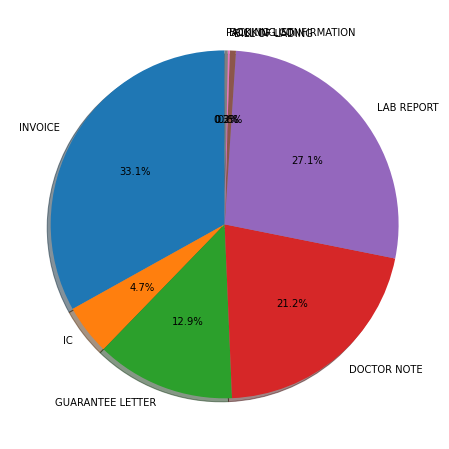

In [13]:
label = 'INVOICE', 'IC','GUARANTEE LETTER','DOCTOR NOTE','LAB REPORT','BILL OF LADING','BOOKING CONFIRMATION','PACKING LIST'
# 0	INVOICE
# 1	IC
# 2	GUARANTEE LETTER
# 3	DOCTOR NOTE
# 4	LAB REPORT
# 5	BILL OF LADING
# 6	BOOKING CONFIRMATION
# 7	PACKING LIST

plt.figure(figsize = (8,8))
plt.pie(labels.groupby('label').size(), labels = label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()


In [14]:
len(label)

8

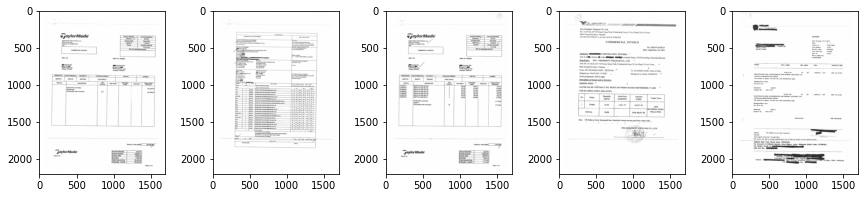

In [11]:
import matplotlib.image as img
fig,ax = plt.subplots(1,5,figsize = (15,3))

for i,idx in enumerate(labels[labels['label'] == 1]['image_name'][-5:]):
    path = os.path.join(train_path,idx)
    ax[i].imshow(img.imread(path))

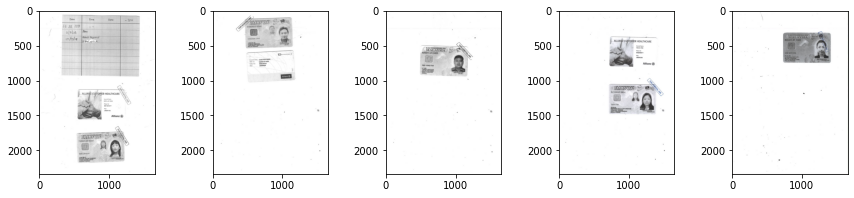

In [10]:
fig,ax = plt.subplots(1,5,figsize = (15,3))
for i,idx in enumerate(labels[labels['label'] == 2]['image_name'][:5]):
    path = os.path.join(train_path,idx)
    ax[i].imshow(img.imread(path))

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [16]:
from PIL import Image
class CactiDataset(Dataset):
    def __init__(self, data, path , transform = None):
        super().__init__()
        self.data = data.values
        self.path = path
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
    
        img_name,label = self.data[index]
        img_path = os.path.join(self.path, img_name)
        image=Image.open(img_path)      
        if self.transform is not None:
            image = self.transform(image)
        torch.cuda.empty_cache()
#         image.cuda(), label.cuda()
        return image, label

In [18]:
train_transform = transforms.Compose([transforms.Resize((128,128)),
                                     transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                     std=[0.229, 0.224, 0.225])]
)
test_transform = transforms.Compose([transforms.Resize((128,128)),
                                     transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                     std=[0.229, 0.224, 0.225])])

valid_transform = transforms.Compose([transforms.Resize((128,128)),
                                     transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                     std=[0.229, 0.224, 0.225])])
# transform1=transforms.Compose([
#             transforms.Resize(img_size),
#             transforms.RandomHorizontalFlip(0.3),
#             transforms.ToTensor(),
#             normalize,
#         ])

In [19]:
train, valid_data = train_test_split(labels, stratify=labels.label, test_size=0.2)


In [20]:
len(train)

9462

In [21]:
train_data = CactiDataset(train, train_path,train_transform)
valid_data = CactiDataset(valid_data, train_path,valid_transform)
test_data = CactiDataset(submission, test_path,test_transform)

In [22]:

num_epochs = 1
num_classes = 8
batch_size = len(train)
learning_rate = 0.001

In [23]:
device = torch.device(torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'))
device

device(type='cuda', index=0)

In [24]:
train_loader = DataLoader(dataset = train_data, batch_size = batch_size,shuffle=True,  num_workers=2)
valid_loader = DataLoader(dataset = valid_data, batch_size = batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle=False, num_workers=2)

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))
    print(image)

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [26]:
trainimages, trainlabels = next(iter(train_loader))

# fig, axes = plt.subplots(figsize=(12, 12), ncols=5)
# print('training images')
# for i in range(5):
#     axe1 = axes[i] 
#     imshow(trainimages[i], ax=axe1, normalize=False)

# print(trainimages[0].size())

In [28]:
len(trainimages)

9462

In [29]:
import sys
sys.version

'3.7.5 (default, Aug  4 2020, 15:43:11) \n[GCC 9.3.0]'

In [30]:
epochs = 10
batch_size = 25
learning_rate = 0.001

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module): 
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(720, 1024)
        self.fc2 = nn.Linear(1024, 2)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [32]:
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=720, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=2, bias=True)
)


In [33]:
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [69]:
# keeping-track-of-losses 
train_losses = []
valid_losses = []

for epoch in range(1, num_epochs + 1):
    # keep-track-of-training-and-validation-loss
    train_loss = 0.0
    valid_loss = 0.0
    
    # training-the-model
    model.train()
    for data, target in train_loader:
        # move-tensors-to-GPU 
        data = data.to(device)
        target = target.to(device)
        
        # clear-the-gradients-of-all-optimized-variables
        optimizer.zero_grad()
        # forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
        output = model(data)
        # calculate-the-batch-loss
        loss = criterion(output, target)
        # backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
        loss.backward()
        # perform-a-ingle-optimization-step (parameter-update)
        optimizer.step()
        # update-training-loss
        train_loss += loss.item() * data.size(0)
        
    # validate-the-model
    model.eval()
    for data, target in valid_loader:
        
        data = data.to(device)
        target = target.to(device)
        
        output = model(data)
        torch.cuda.empty_cache()
        
        loss = criterion(output, target)
        
        # update-average-validation-loss 
        valid_loss += loss.item() * data.size(0)
    
    # calculate-average-losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
        
    # print-training/validation-statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f8e083403b0>
Traceback (most recent call last):
  File "/home/ai-machine/ICE-Ai/Data/maryam/CNN_ICEAI/cnn/venv/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/home/ai-machine/ICE-Ai/Data/maryam/CNN_ICEAI/cnn/venv/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/home/ai-machine/.pyenv/versions/3.7.5/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f8e083403b0>
Traceback (most recent call last):
  File "/home/ai-machine/ICE-Ai/Data/maryam/CNN_ICEAI/cnn/venv/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1101, in

RuntimeError: CUDA out of memory. Tried to allocate 1.40 GiB (GPU 0; 10.75 GiB total capacity; 7.33 GiB already allocated; 1.08 GiB free; 7.35 GiB reserved in total by PyTorch)

In [194]:
# test-the-model
model.eval()  # it-disables-dropout
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in valid_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
    print('Test Accuracy of the model: {} %'.format(100 * correct / total))

# Save 
torch.save(model.state_dict(), 'model.ckpt')

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])
tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/ai-machine/.local/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/ai-machine/.local/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "/home/ai-machine/.local/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py", line 79, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/home/ai-machine/.local/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py", line 79, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/home/ai-machine/.local/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py", line 55, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: stack expects each tensor to be equal size, but got [3, 2338, 1654] at entry 0 and [3, 2339, 1654] at entry 1


tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

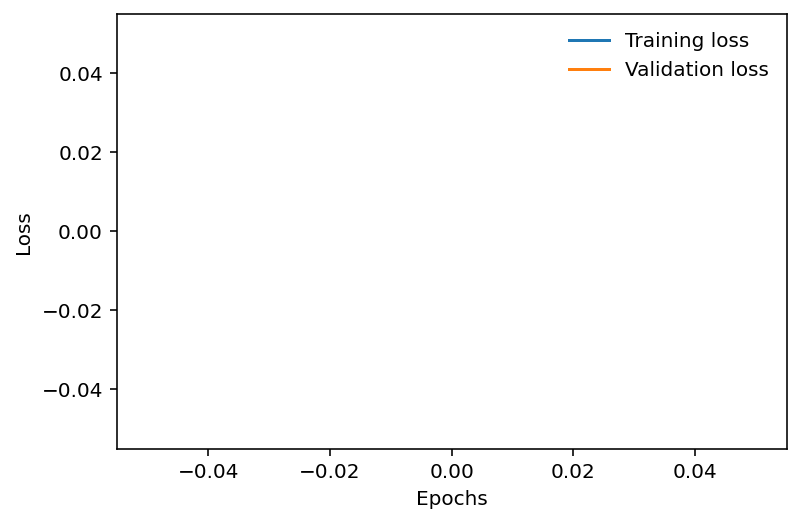

In [199]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

In [37]:

# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
# from skimage.io impot imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
# from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [38]:
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(4 * 7 * 7, 10)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x